In [8]:
import igraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

In [80]:
def match1d(query, target):
    if(set(query).issubset(set(target))):
        result = []
        for i in range(len(query)):
            result.append(np.argwhere(target==query[i])[0,0])
        return(np.array(result))
    else:
        print("Query should be a subset of target!")
        return

def SNN(x, k=3):
    '''
    x: n x m matrix, n is #sample, m is #feature
    '''
    n, m = x.shape
    
    # Find a ranklist of neighbors for each sample
    print('Create KNN matrix...')
    knn = NearestNeighbors(n_neighbors=n)
    knn.fit(x)
    A = knn.kneighbors_graph(x, mode='distance')
    A = A.toarray()
    A_rank = A
    for i in range(n):
        A_rank[i,:] = np.argsort(A[i,:])
    A_rank = np.array(A_rank, dtype='int')
    A_knn = A_rank[:,:k]
    
    # Create weighted edges between samples
    print('Generate edges...')
    edge = []
    for i in range(n):
        for j in range(i+1,n):
            shared = set(A_knn[i,:]).intersection(set(A_knn[j,:]))
            shared = np.array(list(shared))
#             shared = np.intersect1d(A_knn[i,:], A_knn[j,:])

        
    
            if(len(shared) > 0): # When i and j have shared knn
                strength = k - (match1d(shared, A_knn[i,:]) + match1d(shared, A_knn[j, :]) + 2)/2
                strength = max(strength)
                if(strength>0):
                    edge = edge + [i+1, j+1, strength]
            
    edge = np.array(edge).reshape(-1, 3)
    return(edge)

In [108]:

x1 = np.random.randn(100,2)*2-10
x2 = np.random.randn(100,2)+10
x3 = np.random.randn(100,2)+15

X = np.append(x1, x2, axis=0)
X = np.append(X, x3, axis=0)
y = [0]*len(x1)+[1]*len(x2)+[2]*len(x3)



Create KNN matrix...
Generate edges...


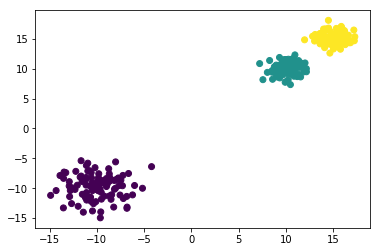

In [109]:
edge = SNN(X, 20)
edge_list = [(int(edge[i,0])-1, int(edge[i,1])-1) for i in range(len(edge))]

g = igraph.Graph()
# in order to add edges, we have to add all the vertices first
#iterate through edges and put all the vertices in a list
vertex = []
for e in edge_list:
    vertex.extend(e)
g.add_vertices(list(set(vertex))) # add a list of unique vertices to the graph
g.add_edges(edge_list) # add the edges to the graph. 

cls = g.community_fastgreedy(weights=edge[:,2]).as_clustering(n=None)
cls?

plt.scatter(X[:,0], X[:,1], c=cls.membership)